## META  PL  IPT  BD  TLS

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn import cross_validation
import time
def loaddata(Filename):
    data = pd.read_csv(Filename,sep=',',header = None)
    return np.array(data)
# dataset
data1 = loaddata("data0_1.csv")
data2 = loaddata("data1_1.csv")
data3 = loaddata("data2_1.csv")
data4 = loaddata("data3_1.csv")
data5 = loaddata("data4_1.csv")

data_train = np.vstack((data1[:len(data1)-1],data2[:len(data1)]))
data_train = np.vstack((data_train,data3[:len(data1)]))
data_train = np.vstack((data_train,data4[:len(data1)]))
data_train = np.vstack((data_train,data5[:len(data1)]))

print('This is data_train',type(data_train),data_train.shape)
#label
data1 = loaddata("label0_1.csv")
data2 = loaddata("label1_1.csv")
data3 = loaddata("label2_1.csv")
data4 = loaddata("label3_1.csv")
data5 = loaddata("label4_1.csv")

label_train = np.vstack((data1[:len(data1)-1],data2[:len(data1)]))
label_train = np.vstack((label_train,data3[:len(data1)]))
label_train = np.vstack((label_train,data4[:len(data1)]))
label_train = np.vstack((label_train,data5[:len(data1)]))
#print(label_test[100:800])
X_train,X_test,y_train,y_test=cross_validation.train_test_split(data_train,label_train,test_size=0.1)

print('This is X_test',type(X_test),X_test.shape)
print('This is y_test',type(y_test),y_test.shape)
print('This cell has done...')

/home/cadu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


This is data_train <class 'numpy.ndarray'> (25954, 661)
This is X_test <class 'numpy.ndarray'> (2596, 661)
This is y_test <class 'numpy.ndarray'> (2596, 1)
This cell has done...


In [2]:
#svm
classifier = svm.SVC(gamma=0.001)

timeStart=time.time()
# learn
print('Training starts...')
classifier.fit(X_train, y_train)

timeHalf=time.time()
print('Train train total time is:',timeHalf-timeStart)
#predicted

print('Test starts...')
expected =y_test
predicted=classifier.predict(X_test)
'''
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
'''
timeEnd=time.time()
print('Test done!The test time is',timeEnd-timeHalf)


Training starts...


/home/cadu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train train total time is: 1001.9097471237183
Test starts...
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.98      0.64      0.78       540
          1       0.74      0.72      0.73       511
          2       0.48      1.00      0.65       476
          3       0.96      0.70      0.81       551
          4       0.96      0.65      0.77       518

avg / total       0.83      0.74      0.75      2596


Confusion matrix:
[[347   0 185   0   8]
 [  0 368 121  18   4]
 [  0   0 476   0   0]
 [  0  88  75 385   3]
 [  7  38 137   0 336]]
The test time is 32.39085125923157


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.98      0.64      0.78       540
          1       0.74      0.72      0.73       511
          2       0.48      1.00      0.65       476
          3       0.96      0.70      0.81       551
          4       0.96      0.65      0.77       518

avg / total       0.83      0.74      0.75      2596



Precision: 83.21196030464144%
Recall: 73.6517719568567%
f1_score: 74.99939936342682%

Confusion Matrix:
[[347   0 185   0   8]
 [  0 368 121  18   4]
 [  0   0 476   0   0]
 [  0  88  75 385   3]
 [  7  38 137   0 336]]

Confusion matrix (normalised to % of total test data):
[[ 13.36671829   0.           7.1263485    0.           0.30816641]
 [  0.          14.

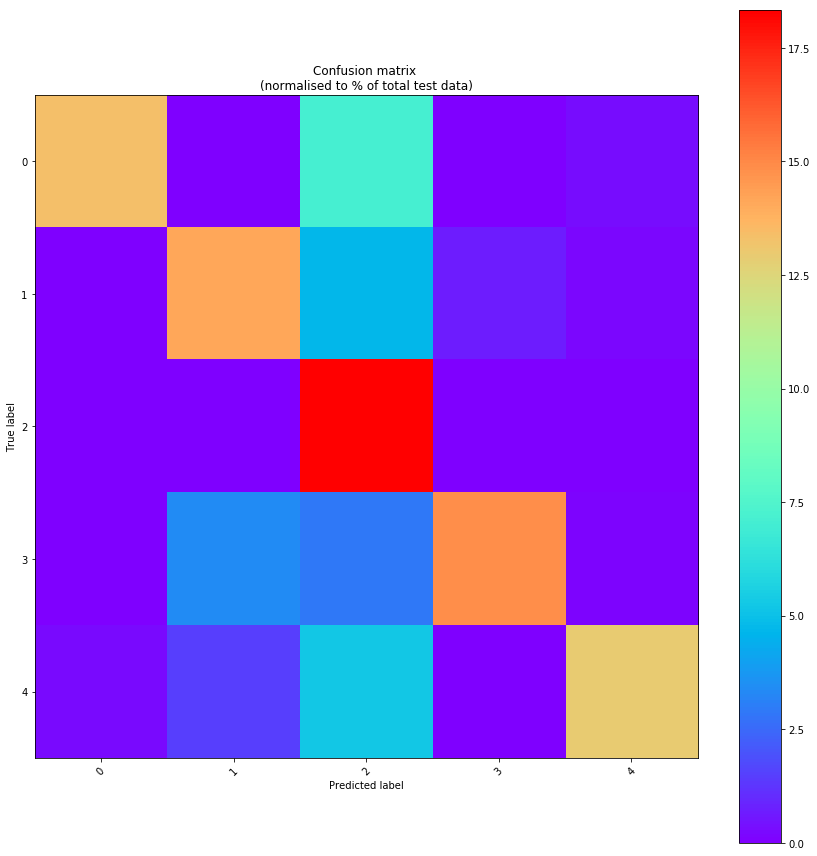

In [11]:
# Results
import matplotlib.pyplot as plt
LABELS = [
    "0",
    "1",
    "2",
    "3",
    "4",
]
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("")
print("Precision: {}%".format(100*metrics.precision_score(expected, predicted, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(expected, predicted, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(expected, predicted, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(expected, predicted)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(5) # n_classes
plt.xticks(tick_marks, LABELS, rotation=45)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()